In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
df=pd.read_csv(r'Irish_DataSet\standardMetersForSmallData.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Month", 2: "Time", 3: "Consumption"},inplace=True)
def convert_date(day):
    base_date = datetime(2009, 7, 14)
    converted_date = base_date + timedelta(days=(day - 195))
    return converted_date

def convert_time(time):
    hours = (time - 1) // 2
    minutes = (time - 1) % 2 * 30
    return f"{(hours):02d}:{(minutes):02d}"

df['Month'] = df['Month'].apply(convert_date)
df

,ID,Month,Time,Consumption
0,1002,2009-07-14,1,0.481127
1,1002,2009-07-14,2,0.085061
2,1002,2009-07-14,3,0.158161
3,1002,2009-07-14,4,0.030569
4,1002,2009-07-14,5,0.186071
...,...,...,...,...
453145,1094,2009-12-31,46,0.273827
453146,1094,2009-12-31,47,0.243249
453147,1094,2009-12-31,48,0.240844
453148,1094,2009-12-31,49,0.000000


In [3]:
df.isnull().sum(), df.nunique()

(ID             0
 Month          0
 Time           0
 Consumption    0
 dtype: int64,
 ID                53
 Month            171
 Time              50
 Consumption    73255
 dtype: int64)

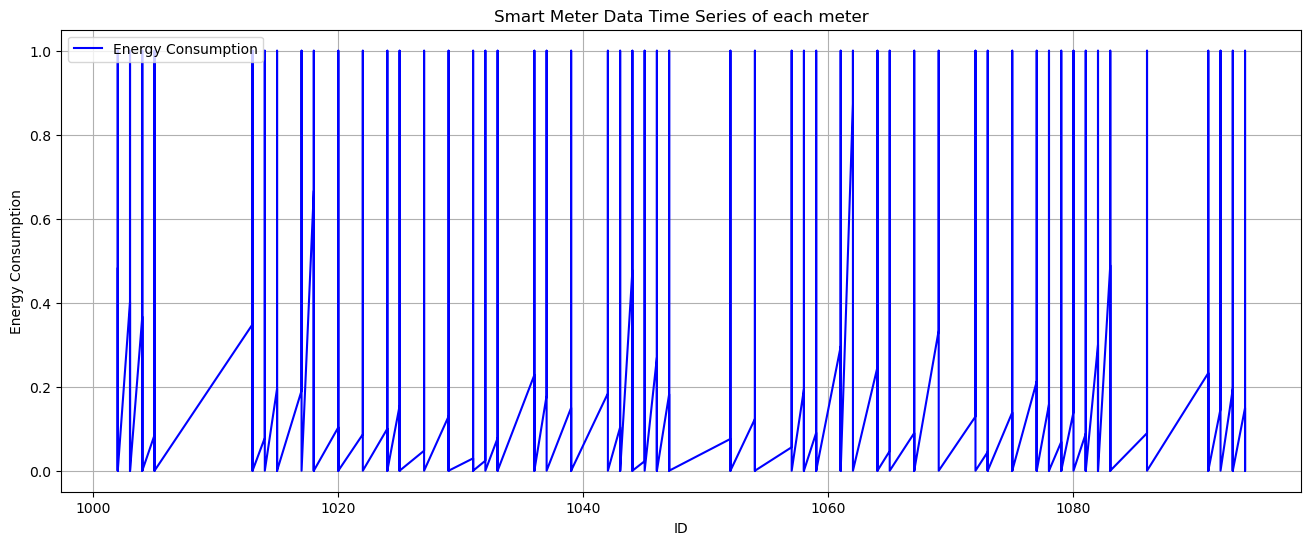

In [4]:
df.set_index("ID", inplace=True)
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Consumption'], label='Energy Consumption', color='blue')
plt.title('Smart Meter Data Time Series of each meter')
plt.xlabel('ID')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

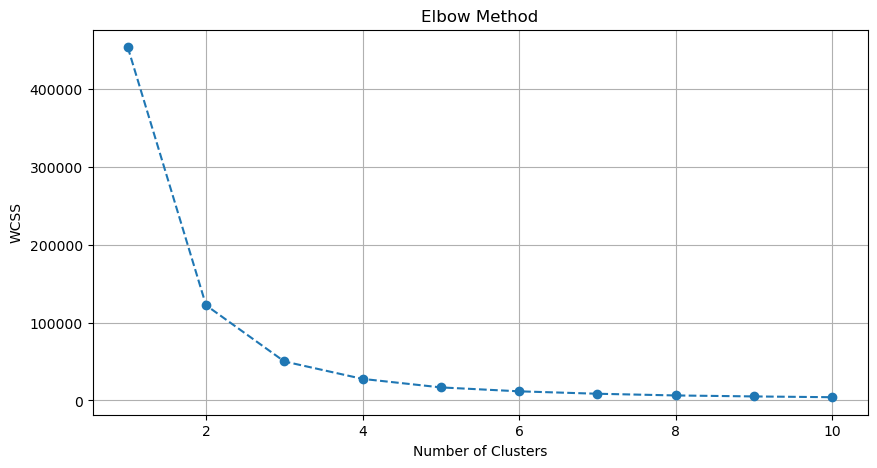

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df[['Consumption']].values)
##elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [9]:
##k-means clustering
# without train and test 
k=4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10,max_iter=100)
kmeans.fit(X_std)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42)

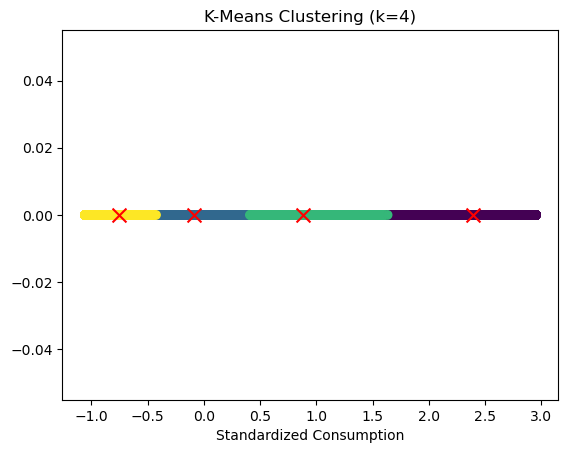

In [10]:
plt.scatter(X_std[:,], [0] * len(X_std), c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,], [0] * len(kmeans.cluster_centers_), c='red', marker='x', s=100)
plt.xlabel('Standardized Consumption')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

In [11]:
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


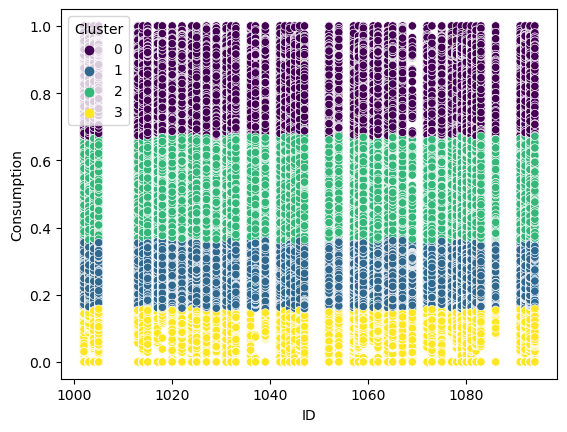

In [12]:
sns.scatterplot(data=df, x='ID', y='Consumption', hue='Cluster', palette='viridis', legend=True)
plt.show()

In [ ]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=10,max_iter=100)
    cluster_labels = kmeans.fit_predict(df[['Consumption']])
    silhouette_avg = silhouette_score(df[['Consumption']], cluster_labels)
    sil_scores.append(silhouette_avg)

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
chosen_k =  4
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Consumption']])

plt.scatter(data['ID'], df['Consumption'], c=df['cluster'])
plt.title('K-Means Clustering (k={})'.format(chosen_k))
plt.xlabel('ID')
plt.ylabel('DailyConsumption')
plt.show()